# TP 3
# Tri par insertion

**ATTENTION :** Le module est `statistics` (avec un `s`)

Si VSCode ne trouve pas les modules `matplotlib`, il faut l'installer et relancer VSCode :

```
pip3 install matplotlib
```

In [17]:
import time
import matplotlib.pyplot as plt
import random
import statistics

## 1. Implémentez l'algorithme du tri par insertion
Votre algorithme doit trier la liste elle-même, et retourne le nombre de comparaisons et d'affectations.

### Algorithme

Soit une liste L de n éléments (indexés de 0 à n-1).

On positionne successivement les éléments de rang k (1 à n-1) de façon à ce que les éléments
de 0 à k soient correctement triés.

| Etape | Résultat        | Action                          |
|-------|-----------------|---------------------------------|
| 0     | [5, 3, 4, 1, 2] | Position de départ              |
| 1     | [3, 5, 4, 1, 2] | On positionne 3 au début        |
| 2     | [3, 4, 5, 1, 2] | On positionne 4 en 2e position  |
| 3     | [1, 3, 4, 5, 2] | On positionne 1 en 1re position |
| 4     | [1, 2, 3, 4, 5] | On positionne 2 en 2e position  |

#### Algorithme stable

On dit d'un algorithme qu'il est stable si les éléments possédant les mêmes valeurs de la clé de
tri restent dans le même ordre. Cela est utile si on veut trier selon 2 clés tels que nom et prénom.

#### Méthode de positionnement

Le positionnement de l'élément k se fait en le comparant aux éléments déjà triés. On peut parcourir
les éléments de manière croissante ou décroissante ; la moyenne du nombre d'opérations étant identique.

Si on souhaite un algorithme stable, on a intérêt à les parcourir de manière décroissante de façon
à limiter le nombre de comparaisons ; si on parcourt de manière croissante, on fera attention à utiliser
une comparaison inclusive (≥).

#### Insertion

On peut adopter deux stratégies pour le positionnement de l'élément :
1. modifications successives des valeurs au gré des comparaisons (les valeurs plus grandes que celle
   à placer remontent d'un cran dans la liste) :
    - 5 4 3 2 1 (k = 1, on positionne 4)
        - 5 5 3 2 1 (car 4 < 5)
    - 4 5 3 2 1 (k = 2)
        - 4 5 5 2 1 (car 3 < 5)
        - 4 4 5 2 1 (car 3 < 4)
    - 3 4 5 2 1 (k = 3)
        - 3 4 5 5 1 (car 2 < 5)
        - 3 4 4 5 1 (car 2 < 4)
        - 3 3 4 5 1 (car 2 < 3)
    - 2 3 4 5 1 (k = 4)
        - 2 3 4 5 5
        - 2 3 4 4 5
        - 2 3 3 4 5
        - 2 2 3 4 5
    - 1 2 3 4 5
2. suppression de l'élément k et réinsertion dans la liste au bonne endroit

L'analyse des performances montre que la deuxième méthode est plus rapide.

On peut également s'interroger s'il est utile de vérifier si l'élément $k$ est déjà à sa place avant de faire
l'échange, l'analyse des performances montre que non.

On aboutit donc à la fonction suivante qui trie sur place une liste.


In [18]:
def insertion_sort(l: list[int]) -> dict[str, int]:
    # Nombre de comparaisons
    cmp = 0
    # Nombre d'affectations
    aff = 0
    for k in range(1, len(l)):
        j = k
        while j > 0 and l[k] < l[j-1]:
            j -= 1

        cmp += min(k, k-j+1)
        l.insert(j, l.pop(k))
        # On compte une affection pour le pop et une pour l'insert
        aff += 2
    return {"cmp": cmp, "aff": aff}

## 2. Testez votre algorithme sur des petits tableaux
Testez sur une liste vide, une liste de taille 1, la liste [1,2,3,4,5], [5, 4, 3, 2, 1] et une liste non ordonnée de longuer 5.

In [19]:
print("insertion_sort()")
lists = [ [], [1], [1,2,3,4,5], [5,4,3,2,1], [5,2,4,1,3] ]
for L in lists:
    print(L, end=" -> ")
    print(insertion_sort(L), end=" -> ")
    print(L)


insertion_sort()
[] -> {'cmp': 0, 'aff': 0} -> []
[1] -> {'cmp': 0, 'aff': 0} -> [1]
[1, 2, 3, 4, 5] -> {'cmp': 4, 'aff': 8} -> [1, 2, 3, 4, 5]
[5, 4, 3, 2, 1] -> {'cmp': 10, 'aff': 8} -> [1, 2, 3, 4, 5]
[5, 2, 4, 1, 3] -> {'cmp': 9, 'aff': 8} -> [1, 2, 3, 4, 5]


## 3. Vérifiez les propriétés
pour `n` entre 100 et 1000 tracez la courbe du temps d'exécution
 - dans le meilleur des cas
 - dans le pire des cas
 - pour des instances aléatoires: vous allez générer vos données en tirant un entier choisi uniformément entre 0 et 10^6. Pour chaque valeur de n, générez 10 listes, calculez le temps moyen pour trier ces dix listes ainsi que l'écart type. Tracez la courbe avec les barres d'erreur
 - Réalisez sur un nouveau graphique avec en abscisse la taille du problème et en ordonnée le nombre de comparaisons.
 
*Bonus*: vous pouvez essayer d'augmenter la valeur de `n` (attention, selon la valeur choisie, cela pourrait prendre plus/trop de temps)

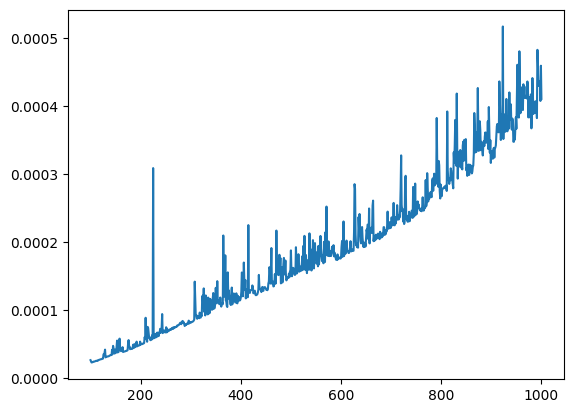

In [20]:
# Temps d'exécution pour les meilleurs et pires cas
sizes = range(100,1001)
times_best = []
for n in sizes:
    # Meilleur cas (déjà trié)
    l_best = list(range(n))
    t = time.monotonic()
    r = insertion_sort(l_best)
    times_best.append(time.monotonic() - t)
    
plt.plot(sizes, times_best, label="Meilleur cas")

La courbe semble logarithmique.

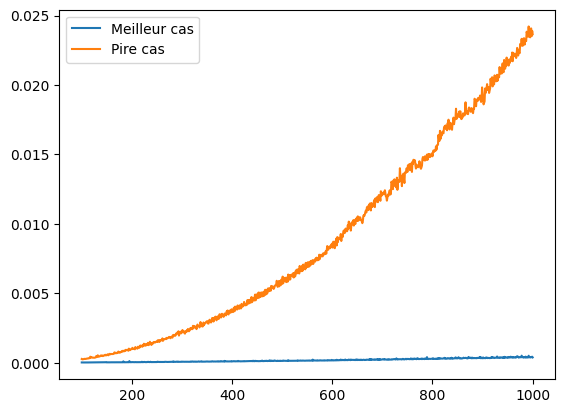

In [21]:
# Temps d'exécution pour les meilleurs et pires cas
sizes = range(100,1001)
times_best = []
times_worst = []
for n in sizes:
    # Meilleur cas (déjà trié)
    l_best = list(range(n))
    t = time.monotonic()
    r = insertion_sort(l_best)
    times_best.append(time.monotonic() - t)
    # Pire cas (trié à l'envers)
    l_worst = list(range(n-1, -1, -1))
    t = time.monotonic()
    r = insertion_sort(l_worst)
    times_worst.append(time.monotonic() - t)

plt.plot(sizes, times_best, label="Meilleur cas")
plt.plot(sizes, times_worst, label="Pire cas")
plt.legend()


Cela ressemble à une parabole

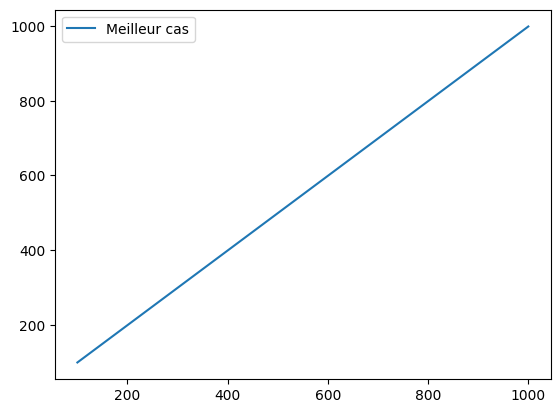

In [22]:
# Nombre de comparaisons meilleur cas
sizes = range(100,1001)
cmps_best = []
for n in sizes:
    l_best = list(range(n))
    r = insertion_sort(l_best)
    cmps_best.append(r["cmp"])
plt.plot(sizes, cmps_best, label="Meilleur cas")
plt.legend()

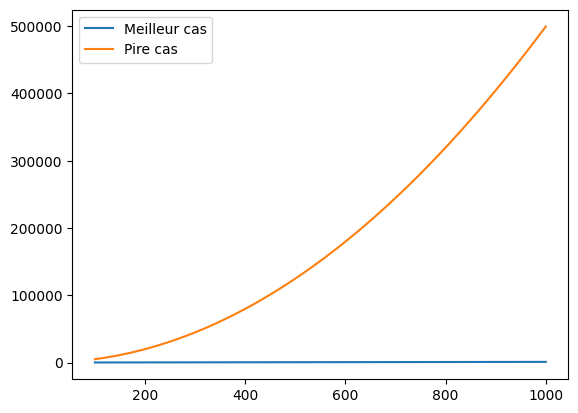

In [23]:
# Nombre de comparaisons
sizes = range(100,1001)
cmps_best = []
cmps_worst = []
for n in sizes:
    l_best = list(range(n))
    r = insertion_sort(l_best)
    cmps_best.append(r["cmp"])

    l_worst = list(range(n-1, -1, -1))
    r = insertion_sort(l_worst)
    cmps_worst.append(r["cmp"])
    
plt.plot(sizes, cmps_best, label="Meilleur cas")
plt.plot(sizes, cmps_worst, label="Pire cas")
plt.legend()

<ErrorbarContainer object of 3 artists>

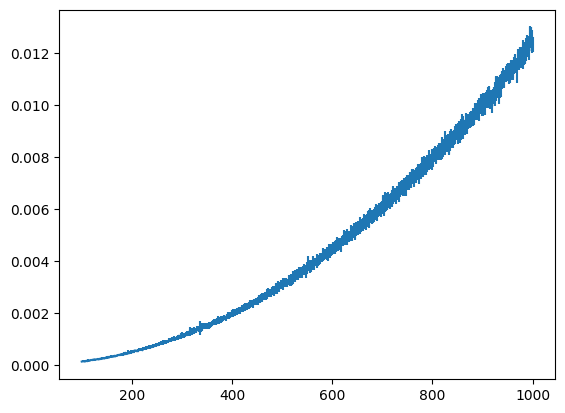

In [24]:
# Aléatoires
sizes = range(100,1001)
times = []
errs = []
for n in sizes:
    sample = []
    for i in range(10):
        l = [random.randint(0, int(1e6)) for _ in range(n)]
        t = time.monotonic()
        insertion_sort(l)   
        sample.append(time.monotonic() - t)
    times.append(statistics.mean(sample))
    errs.append(statistics.stdev(sample))
    
plt.errorbar(sizes, times, yerr=errs, label="Écart-type")

## 4 Variante
Pour insérer l'élément dans la liste ordonnée, on pourrait utiliser la recherche dichotomique pour trouver à quel index insérer l'élément, puis réaliser le décalage.
- implémentez une fonction binarySearchIndex(l,end,v) où l est la liste, end est l'indice tel que la sous liste l[0:end] est triée, et v est l'élément à insérer et qui retourne l'index où insérer v (i.e. un entier entre 0 et end+1)
- Implémentez une fonction insertionSortBS(l) qui utilise cette idée
- Comparez le temps d'exécution de manière expérimentale. Du point de vue théorique, qu'est-ce qu'on attend?
- Comparez le nombre de comparaisons entre l'algorithme standard et cette variante

In [25]:
# Pour que les temps soient comparables on calcule les affectations et on renvoie le même résultat
def binarySearchIndex(l: list[int], end: int, v: int) -> dict[str, int]:
    # Nombre de comparaisons
    cmp = 0
    # [s, e] est l'intervalle de recherche
    s = 0
    e = end + 1
    while s < e:
        cmp += 1
        # Partie entière du milieu de l'intervalle (m < e, donc m ≤ end, donc l[m] existe)
        m = (s+e) // 2
        # On teste '<' pour un algorithme stable
        if v < l[m]:
            # l'indice de v est dans [s, m]
            e = m
        else:
            # L'indice de v est dans [m+1, e]
            s = m + 1
    return {"index": s, "cmp": cmp}

def insertion_sort_binary(A):
    aff = 0
    cmp = 0
    for k in range(1, len(A)):
        r = binarySearchIndex(A, k-1, A[k])
        cmp += r["cmp"]
        aff +=2
        A.insert(r["index"], A.pop(k))
    
    return {
        "cmp": cmp,
        "aff": aff
    }

In [26]:
print("insertion_sort_binary()")
lists = [ [], [1], [1,2,3,4,5], [5,4,3,2,1], [5,2,4,1,3] ]
for L in lists:
    print(L, end=" -> ")
    insertion_sort_binary(L)
    print(L)

insertion_sort_binary()
[] -> []
[1] -> [1]
[1, 2, 3, 4, 5] -> [1, 2, 3, 4, 5]
[5, 4, 3, 2, 1] -> [1, 2, 3, 4, 5]
[5, 2, 4, 1, 3] -> [1, 2, 3, 4, 5]


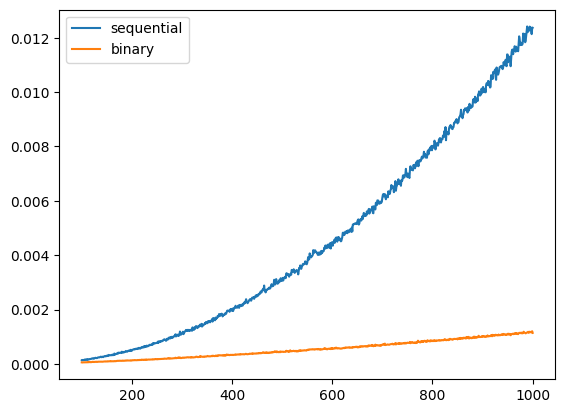

In [27]:
# Comparaison des temps d'exécution pour des listes aléatoires
sizes = range(100,1001)
times = []
times_binary = []
for n in sizes:
    sample = []
    sample_binary = []
    for i in range(10):
        l = [random.randint(0, int(1e6)) for _ in range(n)]
        
        l_copy = l.copy()
        t = time.monotonic()
        insertion_sort(l_copy)   
        sample.append(time.monotonic() - t)

        t = time.monotonic()
        insertion_sort_binary(l)   
        sample_binary.append(time.monotonic() - t)
    times.append(statistics.mean(sample))
    times_binary.append(statistics.mean(sample_binary))
    
plt.plot(sizes, times, label="sequential")
plt.plot(sizes, times_binary, label="binary")
plt.legend()

On constate des temps moyens d'exécution inférieurs.

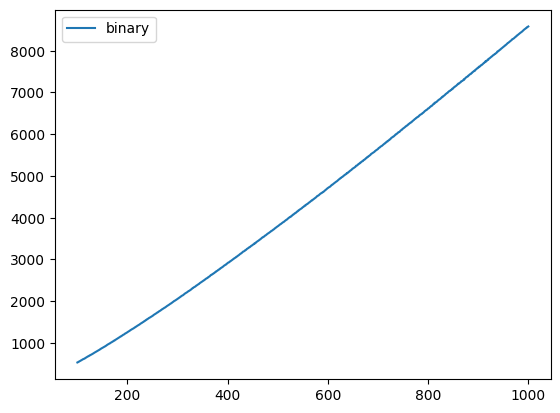

In [28]:
# Comparaison du nombre de comparaisons pour des listes aléatoires
sizes = range(100,1001)
cmps_binary = []
for n in sizes:
    sample_binary = []
    for i in range(10):
        l = [random.randint(0, int(1e6)) for _ in range(n)]
        r = insertion_sort_binary(l) 
        sample_binary.append(r["cmp"]) 
    cmps_binary.append(statistics.mean(sample_binary))
    
plt.plot(sizes, cmps_binary, label="binary")
plt.legend()

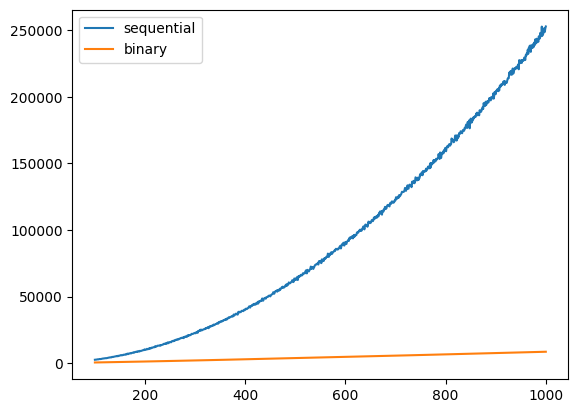

In [29]:
# Comparaison du nombre de comparaisons pour des listes aléatoires
sizes = range(100,1001)
cmps = []
cmps_binary = []
for n in sizes:
    sample = []
    sample_binary = []
    for i in range(10):
        l = [random.randint(0, int(1e6)) for _ in range(n)]
        l_copy = l.copy()
        r = insertion_sort(l_copy)   
        sample.append(r["cmp"])
        r = insertion_sort_binary(l) 
        sample_binary.append(r["cmp"]) 

    cmps.append(statistics.mean(sample))
    cmps_binary.append(statistics.mean(sample_binary))
    
plt.plot(sizes, cmps, label="sequential")
plt.plot(sizes, cmps_binary, label="binary")
plt.legend()

Pour le premier algorithme, on effectue en moyenne $k/2$ comparaisons au niveau $k$, le nombre total moyen de comparaisons est donc en $N^2/4$, ce qui correspond à la courbe ci-dessous.

Dans la recherche par dichotomie, il faut $log_{2}(k)$ comparaisons pour arriver à un intervalle de largeur 1 ($k/2^n = 1$). Le nombre total de comparaisons est donc $log_{2}(N!)$.

Plus les échantillons sont grands, plus la recherche par dichotomie est efficace.